<a href="https://colab.research.google.com/github/xiaorui777/NLP/blob/master/Similar_words_and_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Search Tree  ->  Similar Words
#### 通过搜索树的方法可以找到一个词的相似的词（词向量的概率分布相似）

In [0]:
csv_path = './sqlResult_1558435.csv'

In [0]:
import pandas as pd

In [0]:
content = pd.read_csv(csv_path, encoding = 'gb18030')

In [0]:
content = content.fillna(' ')
news_content = content['content'].tolist()

In [0]:
import jieba
import re

In [6]:
news_content[0]

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [0]:
def cut(string): return " ".join(jieba.cut(string))

In [0]:
def token(string): return re.findall(r'[\w]+', string)

In [0]:
news_content = [token(n) for n in news_content]

In [0]:
news_content = [' '.join(n) for n in news_content]

In [11]:
news_content = ([cut(n) for n in news_content])

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.069 seconds.
Prefix dict has been built succesfully.


In [12]:
news_content[1]

'骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理器   高通 强调   不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心   相反   他们 正 联手 微软   找到 一种 适合 桌面 平台 的   兼顾 性能 和 功耗 的 完美 方案   报道 称   微软 已经 拿到 了 一些 新 的 源码   以便 Windows   10 更好 地 理解 big   little 架构   资料 显示   骁龙 835 作为 一款 集成 了 CPU   GPU   基带   蓝牙   Wi   Fi 的 SoC   比 传统 的 Wintel 方案 可以 节省 至少 30   的 PCB 空间   按计划   今年 Q4   华硕   惠普   联想 将 首发 骁龙 835   Win10 电脑   预计 均 是 二合一 形态 的 产品   当然   高通 骁龙 只是 个 开始   未来 也许 还 能 见到 三星 Exynos   联发科   华为 麒麟   小米 澎湃 等 进入 Windows   10 桌面 平台'

In [0]:
with open('news-sentences-cut.txt', 'w')as f:
    for n in news_content:
        f.write(n + '\n')

In [0]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence 

In [0]:
news_word2vec = Word2Vec(LineSentence('news-sentences-cut.txt'), size = 35, workers = 8)

In [16]:
 news_word2vec.most_similar('说',topn = 20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('表示', 0.8976008892059326),
 ('认为', 0.8567700386047363),
 ('看来', 0.8484138250350952),
 ('指出', 0.8432142734527588),
 ('坦言', 0.8130702972412109),
 ('告诉', 0.7960416674613953),
 ('介绍', 0.7870182991027832),
 ('透露', 0.7482523918151855),
 ('中说', 0.7402211427688599),
 ('称', 0.7368116974830627),
 ('明说', 0.7204200029373169),
 ('文说', 0.7001379728317261),
 ('所说', 0.6958318948745728),
 ('提到', 0.6539344191551208),
 ('强调', 0.6477982997894287),
 ('问', 0.6406140923500061),
 ('特别强调', 0.6338685750961304),
 ('如是说', 0.6172906160354614),
 ('时说', 0.6146233081817627),
 ('相信', 0.6136190891265869)]

In [17]:
 news_word2vec.most_similar('指出',topn = 20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('认为', 0.9168087840080261),
 ('表示', 0.89305180311203),
 ('说', 0.8432143926620483),
 ('强调', 0.8040673136711121),
 ('称', 0.7831950187683105),
 ('看来', 0.7539883255958557),
 ('介绍', 0.7289222478866577),
 ('坦言', 0.7250171303749084),
 ('普遍认为', 0.717861533164978),
 ('建议', 0.7169000506401062),
 ('透露', 0.7154723405838013),
 ('中说', 0.6795278787612915),
 ('特别强调', 0.6763197779655457),
 ('提到', 0.6730482578277588),
 ('表明', 0.6695089340209961),
 ('文说', 0.6639866828918457),
 ('说明', 0.6570356488227844),
 ('中称', 0.647436797618866),
 ('所说', 0.6311272978782654),
 ('告诉', 0.6227320432662964)]

In [18]:
news_word2vec.most_similar('表示',topn = 20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('说', 0.8976008892059326),
 ('指出', 0.8930517435073853),
 ('认为', 0.8845583200454712),
 ('透露', 0.8177427649497986),
 ('坦言', 0.787850558757782),
 ('看来', 0.7868240475654602),
 ('介绍', 0.7685011625289917),
 ('称', 0.7527901530265808),
 ('强调', 0.7351047396659851),
 ('中说', 0.6912063360214233),
 ('告诉', 0.6637974381446838),
 ('提到', 0.6616037487983704),
 ('建议', 0.6566609144210815),
 ('文说', 0.6498594880104065),
 ('特别强调', 0.6270115375518799),
 ('普遍认为', 0.6175589561462402),
 ('所说', 0.609308123588562),
 ('时说', 0.6069957613945007),
 ('呼吁', 0.6038222312927246),
 ('中称', 0.5960525870323181)]

### 由上可知，从topn中选取答案再迭代的效果会更好，定义一个迭代

In [0]:
from collections import defaultdict

In [0]:
def get_related_words(initial_words, model):
    '''
    @initial_words are initial words we already now 
    @model is the word2vec model
    '''
    unseen = initial_words
    
    seen = defaultdict(int)
    
    max_size = 500
    
    while unseen and len(seen) < max_size:
        if len(seen) % 100 == 0: 
            print('seen length : {}'.format(len(seen)))
            
        node = unseen.pop(0)
                          
        new_expanding = [w for w, s in model.most_similar(node, topn = 20)]
        unseen += new_expanding
        seen[node] += 1
    return seen

In [21]:
related_words = get_related_words(['说','表示'],  news_word2vec)

seen length : 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


seen length : 100
seen length : 200
seen length : 200
seen length : 300
seen length : 400
seen length : 400


In [22]:
# 按相近的次数排序
sorted(related_words.items(), key=lambda x: x[1], reverse=True)

[('指出', 98),
 ('认为', 87),
 ('所说', 87),
 ('说', 84),
 ('提到', 79),
 ('表示', 78),
 ('坦言', 78),
 ('透露', 73),
 ('看来', 64),
 ('告诉', 55),
 ('介绍', 55),
 ('特别强调', 52),
 ('称', 47),
 ('明说', 41),
 ('强调', 41),
 ('中说', 40),
 ('提及', 37),
 ('问', 34),
 ('说明', 34),
 ('文说', 33),
 ('中称', 30),
 ('深有体会', 30),
 ('相信', 29),
 ('普遍认为', 27),
 ('写道', 26),
 ('建议', 25),
 ('说道', 25),
 ('解释', 23),
 ('表明', 21),
 ('声称', 20),
 ('时说', 19),
 ('看法', 19),
 ('地说', 19),
 ('如是说', 18),
 ('承认', 18),
 ('而言', 17),
 ('呼吁', 16),
 ('直言', 15),
 ('推测', 15),
 ('时称', 15),
 ('觉得', 14),
 ('列举', 14),
 ('看好', 13),
 ('证实', 13),
 ('引用', 13),
 ('知道', 13),
 ('描述', 13),
 ('坦承', 12),
 ('还称', 12),
 ('第三份', 12),
 ('反复强调', 12),
 ('原话', 11),
 ('问道', 11),
 ('确信', 11),
 ('阐述', 11),
 ('充满信心', 10),
 ('八面玲珑', 10),
 ('请问', 10),
 ('问过', 10),
 ('说法', 9),
 ('称赞', 9),
 ('怼', 9),
 ('回答', 9),
 ('要求', 9),
 ('期待', 9),
 ('来说', 8),
 ('见到', 8),
 ('了解', 8),
 ('获悉', 8),
 ('据介绍', 8),
 ('供图', 8),
 ('丁光宏', 8),
 ('中国机电产品进出口商会', 8),
 ('罗超毅', 8),
 ('测算', 8),
 ('知情', 8),
 ('官方',

In [23]:
len(news_word2vec.wv.vocab)

97926

## TFIDF （keywords）
#### TF：Term Frequency（一个词在文本中出现的频率，出现的次数越多则该词越重要）
#### IDF：Inver Document Frequency （有N个文本，如果一个词在越多的文本中出现，则越不重要，例如：’的‘，’是‘）

#### 一个词的重要程度：TF * IDF

In [0]:
def document_frequency(word):
    return sum(1 for n in news_content if word in n)

In [25]:
document_frequency('的')

70342

In [26]:
document_frequency('新能源')
# ‘新能源’ 比 ‘的’ 重要

484

In [0]:
import math

In [0]:
# 使得 DF 单调递增

def idf(word):
    '''
    we get the inversed document frequency
    '''
    return math.log10(len(news_content)/document_frequency(word))

In [29]:
idf('的')

0.10514661155144739

In [30]:
idf('新能源')

2.267515962148061

In [31]:
idf('的') < idf('新能源')
# ‘新能源’ 比 ‘的’ 重要

True

In [0]:
# 定义 Term Frequency
def tf(word, document):
    '''
    get the tern frequency of a @word in a @document.
    '''
    words = document.split()
    return sum(1 for w in words if w == word)

In [33]:
news_content[20]

'原 标题   叙利亚 被   袭机   事件 惹怒 俄罗斯   警告 将 瞄准 美 战机   海外 网 6 月 19 日电   当地 时间 6 月 19 日   俄罗斯国防部 对 美国 军方 击落 叙利亚 飞机 一事 作出 反击   宣布 停止 执行 俄美 两国 签署 的   在 叙 飞行 安全 备忘录   并称 以后 美国 领导 的 国际 联军 所有 的 战机   都 是 俄罗斯 军方 监控 与 瞄准 的 目标   叙利亚 局势 进一步 复杂化   据 纽约时报 消息   由于 美国 军方 今日 击落 了 一架 叙利亚 军机   俄罗斯国防部 发布 消息   自 6 月 19 日起 暂停 执行 俄美间 在 叙利亚 领空   防止 空中 事件 和 保障 行动 期间 飞行 安全   的 相互 谅解 备忘录   要求 美方 指挥部 对此 事件 进行 彻查   结果 与 俄方 共享   公告 称   俄空军 在 叙利亚 领空 执行 任务 的 地区 里   幼发拉底河 西岸 发现 的 任何 飞行物   包括 美国 领导 的 国际 联军 的 飞机 和 无人机   都 将 是 俄罗斯 军方 地面 和 空中 防空 武器 监控 与 瞄准 的 目标   据 叙利亚 军方 声明   当地 时间 6 月 19 日   一架 政府 军机 正 前往 拉卡   Raqqa   市   准备 对 盘踞 于 此 的 IS 武装 分子 进行 打击   却 突然 遭到 美军 袭击   飞行员 至今 失踪   声明 称   这次 袭击 发生 的 时机   是 在 叙利亚 政府 及其 盟国 的 军队 在 与 IS 恐怖分子 的 战斗 中 获得 优势 的 情况 下 发生 的   本来 这些 恐怖分子 已经 在 叙利亚 的 沙漠 中 节节败退   此次   袭机   事件   惹怒   了 俄罗斯   俄罗斯 参议院 国防委员会 副 主席 弗朗茨   克莱 琴 谢夫   Frants   Klintsevich   称 美军 的 行动 是   挑衅 行为   实际上 是 对 叙利亚 的   军事 侵略   该 部门 认为   美军   故意 不 履行 双方 2015 年 签署 的   安全 备忘录   中 规定 的 义务   因此 宣布 暂停 与 美军 在 该 框架 下 的 合作   据 报道   该 协议

In [34]:
tf('俄罗斯', news_content[20])
# '俄罗斯' 在这个本文中很重要，出现了7次

7

In [0]:
# 一个词的重要程度：TF * IDF
def get_keywords(document):
    words = set(document.split())
    tfidf = [
        (word, tf(word,document) * idf(word)) for word in words
    ]
    tfidf = sorted(tfidf, key = lambda X : X[1], reverse = True)
    return tfidf

In [36]:
# 关键字按重要程度排序
get_keywords(news_content[20])

[('叙利亚', 28.329791466015845),
 ('军方', 10.881934963315523),
 ('俄罗斯', 8.814135250471294),
 ('袭机', 8.700602664929022),
 ('美军', 8.53126955300242),
 ('惹怒', 7.746360155489698),
 ('瞄准', 7.395668844945861),
 ('备忘录', 7.221162621979949),
 ('暂停', 6.566799990688608),
 ('领空', 6.392972936239964),
 ('俄罗斯国防部', 6.252573042183294),
 ('联军', 6.227024466110437),
 ('军机', 6.202205950146797),
 ('击落', 6.19005765472241),
 ('地面', 6.038526213521566),
 ('IS', 5.98663986294276),
 ('事件', 5.812346967601025),
 ('恐怖分子', 5.126390478855883),
 ('袭击', 5.1212864530050375),
 ('俄方', 4.91363397249205),
 ('战机', 4.8624464801768745),
 ('美国', 4.82034990942493),
 ('协议', 4.714822658965721),
 ('执行', 4.5947421127317245),
 ('该', 4.56652152879515),
 ('Klintsevich', 4.475240069072811),
 ('Raqqa', 4.475240069072811),
 ('Frants', 4.475240069072811),
 ('一架', 4.456170908383369),
 ('军队', 4.363018624300659),
 ('监控', 4.2910065885473125),
 ('行动', 4.2278612662768245),
 ('杨佳', 4.17421007340883),
 ('相冲突', 4.17421007340883),
 ('2254', 4.174210073408

## Word Cloud

In [0]:
import wordcloud
import os

In [0]:
wc = wordcloud.WordCloud(font_path = './SourceHanSerif-ExtraLight.ttc')

In [39]:
os.path.isfile('./SourceHanSerif-ExtraLight.ttc')

True

In [0]:
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [0]:
Russia_news_keywords = get_keywords(news_content[20])

In [0]:
Russia_news_keywords_dict = {w: score for w, score in Russia_news_keywords}

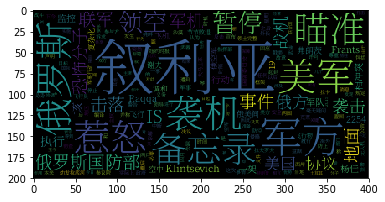

In [44]:
plt.imshow(wc.generate_from_frequencies(Russia_news_keywords_dict))

## 可以生成带背景图片形状的词云

In [0]:
social_news = get_keywords(news_content[4])

In [0]:
from PIL import Image
import numpy as np

In [0]:
xigua_mask = np.array(Image.open('./xigua.jpg'))

In [0]:
wordcloud_with_mask = wordcloud.WordCloud(
    font_path = './SourceHanSerif-ExtraLight.ttc', 
    mask = xigua_mask,
)

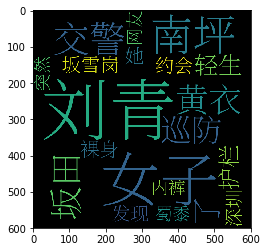

In [53]:
# 不是原图图片太小
plt.imshow(wordcloud_with_mask.generate_from_frequencies({w:s for w, s in social_news[:20]}))

## TFIDF Vectorized
#### 将两篇文章用TFIDF表示成两个向量，当有一个新的文章，我们可以通过向量的夹角判断这篇文章更接近哪一篇文章。

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
# 只取出现频率最高的1000个单词的TFIDF值
vectorized = TfidfVectorizer(max_features = 10000)

In [0]:
#取一万篇文章
sample_num = 10000
sub_samples = news_content[:sample_num]

In [0]:
X = vectorized.fit_transform(sub_samples)

In [114]:
# 10000篇文章，10000个TFIDF值
X.shape

(10000, 10000)

In [116]:
# 因为总的单词太多了，而一篇文章中很多单词是没出现过的，所以对于一篇文章来说，TF大多数为0，大多数位置为0
# 通过 np.where() 函数可以知道那些位置有值
np.where(X[0].toarray())

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([  37,   56,  408, 1062, 1082, 1683, 1890, 1962, 1990, 2724, 2791,
        2897, 4125, 4240, 4259, 4525, 4637, 4656, 4937, 5012, 5756, 5848,
        5874, 5925, 6008, 6047, 6293, 6931, 7371, 7392, 7645, 7710, 9084,
        9149, 9636]))

In [117]:
# 比如：第37位有值
X[0].toarray()[0][37]

0.09800434081833037

In [118]:
# 比如：第98位没有值
X[0].toarray()[0][98]

0.0

In [0]:
# 随机从10000篇文章中选择两篇文章
import random
document_id_1, document_id_2 = random.randint(0,10000),random.randint(0,10000)

In [127]:
document_id_1

5812

In [128]:
document_id_2

1883

In [129]:
news_content[document_id_1]

'原 标题   央视 辟谣   国产 食盐   添加剂   堪比 砒霜   纯属 胡说八道   近日   网上 流传 一些 关于 质疑 国产 食盐 安全 的 文章   网传 文章 提到   国产 食盐 里面 有种 可怕 的 添加剂   亚铁氰化钾   在生活中   烹饪 食物 的 时候   食用盐 遇 高温 有 可能 会 使 亚铁氰化钾 分解成 氰化钾 这种 剧毒 物质   在 10 秒钟 内能 使人 丧失 意志   几分钟 内 可以 毒死 一人   网传 文章 中 还 提到   奥运会   世博会 特供 食盐 及 出口 食盐 均 不 含 亚铁氰化钾   这一 传言 在 网上 迅速 传播   很多 网友 面对 传言 真假难辨   忧心忡忡   国产 食盐 究竟 安全 吗   国产 食盐 中 真的 含有 亚铁氰化钾 吗   这种 物质 会 对 人体 产生 危害 吗   为了 查证 传言 的 真实性   我们 记者 首先 来到 了 北京 的 一家 大型 连锁 超市   在 调味品 区 的 货架 上   记者 发现   这里 一共 有 12 种 不同 种类 的 食盐   其中 国产 食盐 有 9 种   除了 竹盐 和 湖盐 这 两种 盐 里面 没有 添加   亚铁氰化钾   外   其他 7 种 食盐   包括 低钠 岩盐   深井 岩盐 和 海藻 岩盐 里 都 标明 含有 亚铁氰化钾   看来 网传 文章 提到 的   国产 食盐 含有 亚铁氰化钾 这一 说法 还是 真实 的   亚铁氰化钾 是 一种 合法 的 食品 添加剂   那么 食盐 中抗 结剂 亚铁氰化钾 真的 像 传言 说 的 那样 是 一种 慢性 毒药 吗   含有 亚铁氰化钾 的 国产 食盐 对人 体会 不会 造成 伤害 呢   为此   记者 找到 了 中华预防医学会 健康 传播 分会 常务委员 钟凯   钟凯 在 食品安全 方面 有着 多年 的 研究 和 经验   他 告诉 记者   亚铁氰化钾 是 一种 合法 的 食品 添加剂   国产 食盐 中 的 亚铁氰化钾 长期 食用 并 不会 给 人体 带来 伤害   中华预防医学会 健康 传播 分会 常务委员 钟凯   其实 最 简单 的 判别 标准   它 是 一种 合法 的 食品 添加剂   那么 在 批准 它 使用 之前 要 经过 很多很多 科学研

In [130]:
news_content[document_id_2]

'在 仓库 仓单 的 基础 上   黄大豆 2 号 引入 了 厂库 仓单 制度   同时 大幅 优化 期转现 交割   调整 滚动 交割   为 买卖双方 客户 参与 交割 提供 便利   大商所 相关 负责人 表示   引入 厂库 交割 制度   能够 提供 数量 充足 的 厂库 仓单   确保 交割 安全   同时 通过 优化 期转现 和 滚动 交割 制度   增加 通过 交割 买入 进口 大豆 的 便利性   引入 厂库 交割 制度   大商所 将 已 进入 大豆 压榨 工厂 的 进口 大豆 纳入 可 交割 范围   能够 增加 可 供 交割 量   确保 交割 安全   由于 相关 管理 规定 不 允许 进入 大豆 加工厂 的 大豆 外流   且 进口 大豆 只能 用于 压榨   大商所 通过 制度 安排   允许 买方 客户 接到 厂库 仓单 后   委托 厂库 将 大豆 加工 成 豆粕 和 豆油   而 厂库 应当 接受 货主 委托   按照 78   5   的 豆粕 得率   18   5   的 豆油 得率   提供 符合 交易所 规定 的 期货 交割 质量标准 的 豆粕 和 豆油   货主 委托 厂库 加工 的   应当 在 提货 前向 厂库 支付 加工 费用   包括 大豆 委托 加工费 和 豆粕 包装费   该 负责人 讲解 了 厂库 交割 的 具体操作 方式   卖方 注册 信用 仓单 时   须 按照 交易所 规定 缴纳 100   的 现金 保证金 或 120   的 银行 保函   仓单 注销 后   买方 提货 前 需向 交割 厂库 支付 交易所 规定 的 委托 加工 费用   暂定为 160 元   吨   交易所 将 根据 市场 情况 变化 适时 调整 委托 加工费   在 出库 流程 上   他 说   厂库 出库 时   货主 应当 在 标准 仓单 注销 日后   不 含 注销 日   的 4 个 自然 日内   含 当日   到 厂库 提取 豆粕 和 豆油   厂库 应当 在 标准 仓单 注销 日后   不 含 注销 日   的 4 个 自然 日内   含 当日   开始 发货   货主 提取 豆粕   豆油 时   厂库 应当 将 其 视同 期货 交割 商品   优先 办理 出库   出库 时   厂库 应当 在 货主 

In [0]:
# 讲两个文章用TFIDF向量化
vector_of_d1 = X[document_id_1].toarray()[0]
vector_of_d2 = X[document_id_2].toarray()[0]

In [132]:
# 这些位置是有值的
np.where(vector_of_d1)

(array([   8,   12,   25,   37,   47,   96,   97,  106,  131,  134,  153,
         160,  178,  231,  238,  335,  338,  345,  346,  357,  389,  398,
         405,  433,  439,  441,  453,  456,  471,  477,  483,  486,  531,
         604,  670,  673,  693,  711,  727,  735,  746,  755,  774,  790,
         824,  832,  860,  878,  905,  908,  933,  951,  965,  967,  969,
        1014, 1015, 1021, 1027, 1044, 1056, 1062, 1074, 1087, 1089, 1123,
        1126, 1142, 1143, 1163, 1164, 1171, 1219, 1220, 1221, 1222, 1261,
        1265, 1266, 1272, 1296, 1307, 1348, 1365, 1374, 1377, 1387, 1404,
        1410, 1411, 1433, 1440, 1495, 1500, 1509, 1522, 1523, 1549, 1575,
        1582, 1588, 1589, 1593, 1599, 1667, 1674, 1683, 1743, 1759, 1771,
        1787, 1890, 1909, 1928, 1962, 1967, 1970, 1986, 1988, 1993, 1996,
        2031, 2125, 2126, 2150, 2153, 2163, 2169, 2192, 2194, 2212, 2223,
        2260, 2320, 2321, 2334, 2346, 2351, 2379, 2414, 2419, 2483, 2486,
        2488, 2492, 2496, 2613, 2672, 

In [0]:
# 随机再取一个文章
random_choose = random.randint(0,10000)

In [134]:
random_choose

3168

In [135]:
news_content[random_choose]

'参考消息 网 6 月 16 日 报道   韩媒称   中国 国家 质量 监督 检验 检疫 总局 12 日 发布 针对 203 家 境外 生产 企业   211 家 境外 出口商   217 家 进口商 的 进口 食品 化妆品 安全 风险 预警 通告   韩国 14 家 厂商 和 10 家 出口商 上榜   据 韩联社 6 月 16 日 报道   上述 企业 产品 过去 三年 曾 被 拒绝 入境   并 达到 2014 年 公告   进口 食品 不良 记录 管理 实施细则   所 规定 批次   相关 产品 再次 进口 报检 时   应 按照 控制措施 的 要求   提交 相应 检测 报告 或 合格 证明 材料   被 拉 黑 企业 满足   解除 风险 预警 条件   后   申请 解除 预警 方可 恢复正常 报检   报道 称   继 4 月 中方 对 乐天 等 韩国 食品 及 化妆品 未予 准入 后   又拉响 韩企 风险 预警   引发 对   限韩 反萨   力度 加大 的 担忧   韩国 驻华使馆 相关 人士 就此 表示   小微 企业 产品 出口 时 或 未 准备充分   此次 风险 预警 与   萨德   无关   资料 图片   威海 的 一家 韩国 乐天 百货   新华社 记者   郭绪雷   摄   点击 图片 进入 下 一页'

In [0]:
# 比较第三篇文章和之前两篇文章之间的余弦距离
from scipy.spatial.distance import cosine

In [0]:
def distance(v1, v2): return cosine(v1, v2)

In [138]:
# 与 document1 距离更近，两篇文章更接近
# 但是由于数据量不够，文章太短，两者差距不大
distance(X[random_choose].toarray()[0], vector_of_d1)

0.9426933581684707

In [139]:
distance(X[random_choose].toarray()[0], vector_of_d2)

0.9602508914277632